# Grid- und Randomsearch

## Imports

In [123]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import itertools
import random

## Datengrundlage

In [17]:
data = pd.read_csv("../data/mpg.csv")
x_train, x_test, y_train, y_test = train_test_split(data.drop(["mpg"],axis=1), data["mpg"], test_size=0.25, random_state=45)

## Training eines Decision Tree Regressors

In [26]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

mse(y_test,dt.predict(x_test))

18.969700000000003

## Definition des Optimierungsspaces

In [101]:
space = {"max_depth":np.arange(1,30),
         "min_samples_split":np.arange(2,50,10)}

print("Anzahl möglicher Kombinationen: {}".format(np.prod([len(value) for key, value in space.items()])))

Anzahl möglicher Kombinationen: 145


## Gridsearch

In [129]:
grid_errors = []

# iteriere über jede Hyperparameterkombination
for params in tqdm(itertools.product(space["max_depth"],space["min_samples_split"])):
    dt = DecisionTreeRegressor(max_depth=params[0],min_samples_split=params[1])
    dt.fit(x_train,y_train)

    error = mse(y_test,dt.predict(x_test))
    if len(grid_errors) == 0 or error < np.min(grid_errors):
        best_params_grid = [max_depth_i,min_samples_split_i]
    grid_errors.append(error)
            
print("Der best Baum hat einen MSE von {} und die Parameter {}".format(np.min(grid_errors),best_params))


Der best Baum hat einen MSE von 16.346118864244232 und die Parameter [7, 12]


## Randomsearch

In [130]:
random_errors = []
for i in tqdm(range(np.prod([len(value) for key, value in space.items()]))):
    max_depth_i = random.choice(space["max_depth"])
    min_samples_split_i = random.choice(space["min_samples_split"])
    
    dt = DecisionTreeRegressor(max_depth=max_depth_i,min_samples_split=min_samples_split_i)
    dt.fit(x_train,y_train)
    
    error = mse(y_test,dt.predict(x_test))
    if len(random_errors) == 0 or error < np.min(random_errors):
        best_params_random = [max_depth_i,min_samples_split_i]
    random_errors.append(error)


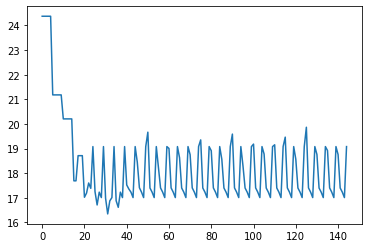

In [103]:
plt.plot(errors)

In [131]:
grid_errors_min = []
for i in grid_errors:
    if len(grid_errors_min) == 0 or i < np.min(grid_errors_min):
        grid_errors_min.append(i)
    else:
        grid_errors_min.append(grid_errors_min[-1])
        
random_errors_min = []
for i in random_errors:
    if len(random_errors_min) == 0 or i < np.min(random_errors_min):
        random_errors_min.append(i)
    else:
        random_errors_min.append(random_errors_min[-1])

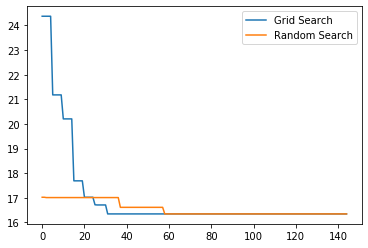

In [132]:
plt.plot(grid_errors_min,label="Grid Search")
plt.plot(random_errors_min,label="Random Search")
plt.legend()
plt.show()

In [53]:
lowest_error

16.346118864244232

In [54]:
best_params

[7, 12]